# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import traceback
import matplotlib.pyplot as plt


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [17]:
# 1. carregar
df = pd.read_csv('housing.csv')  # ajuste o nome do arquivo

# 2. inspeção rápida
print(df.info())
print(df.isnull().sum())

# 3. target e features
target = 'median_house_value'
X_df = df.drop(columns=[target])
y = df[target].values

# 4. tratar NA (exemplo para colunas numéricas)
for col in X_df.select_dtypes(include=['float64','int64']).columns:
    X_df[col].fillna(X_df[col].median(), inplace=True)

# 5. codificar categóricas
X_df = pd.get_dummies(X_df, drop_first=True)

# 6. converter para arrays
X = X_df.values
print('X shape:', X.shape, 'y shape:', y.shape)

# 7. escalonar (opcional)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 8. dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proxim

C:\Users\wilma\AppData\Local\Temp\ipykernel_16028\4151060452.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_df[col].fillna(X_df[col].median(), inplace=True)


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

C:\Users\wilma\AppData\Local\Temp\ipykernel_16028\1021313782.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


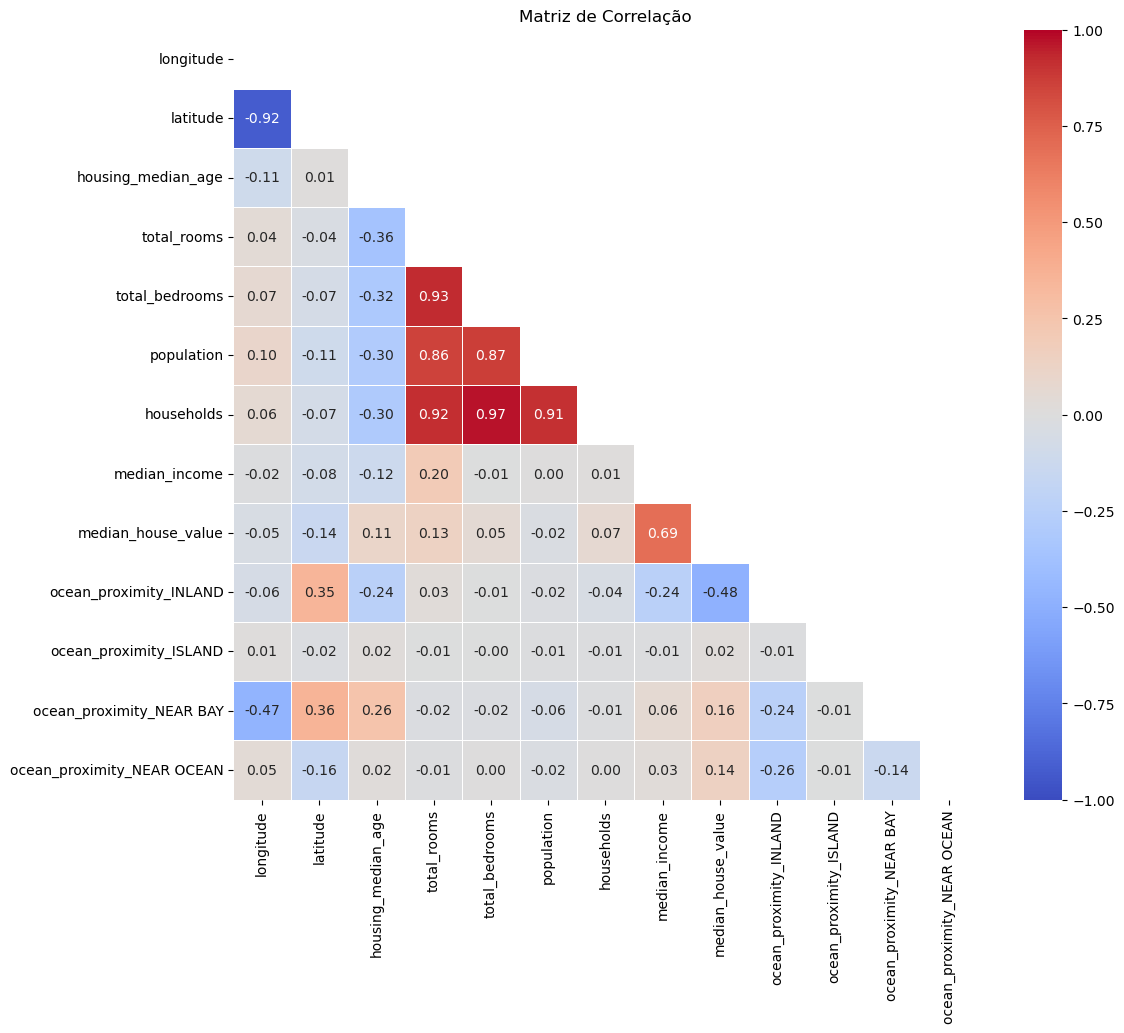


Top 5 features (por correlação absoluta):
median_income                 0.688075
ocean_proximity_INLAND        0.484859
ocean_proximity_NEAR BAY      0.160284
latitude                      0.144160
ocean_proximity_NEAR OCEAN    0.141862
Name: median_house_value, dtype: float64


In [15]:
# tratar missing nas numéricas
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# codificar categóricas
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# calcular correlação e mostrar correlações com o target
corr = df.corr()
target = 'median_house_value'
print(corr[target].sort_values(ascending=False))

# plotar heatmap (metade superior mascarada)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

# top 5 features por correlação absoluta (exclui o próprio target)
top5 = corr[target].drop(labels=[target]).abs().sort_values(ascending=False).head(5)
print("\nTop 5 features (por correlação absoluta):")
print(top5)

## Variáveis com potencial preditivo
    • median_income — melhor candidato: correlação positiva forte (~0.69) com median_house_value. Reflete poder aquisitivo da região, costuma ser o preditor mais informativo.
    • ocean_proximity (dummies) — sinal claro: categorias como NEAR BAY e NEAR OCEAN têm correlação positiva; INLAND tem correlação negativa significativa (~-0.48). Proximidade ao mar/baía impacta preços.
    Resumo 
    • Median_income é o preditor mais forte e direto.
    • Ocean_proximity captura efeito de localização que a renda não explica totalmente.
    •Juntas, renda e proximidade ao mar ajudam muito a prever o preço das casas.

### 3. Separe os dados em validação e teste

In [13]:
# definir X e y
y = df['median_house_value'].values
X = df.drop(columns=['median_house_value'])

# tratar missing nas numéricas
for col in X.select_dtypes(include=['float64','int64']).columns:
   X = X.fillna(X.median())

# codificar categóricas (se houver)
if 'ocean_proximity' in X.columns:
    X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

# converter para arrays
X = X.values

# 1) separar teste (20%) e restante (80%)
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 2) separar validação (20% do total) a partir do restante
# para obter 20% do total como validação, usamos test_size = 0.25 sobre X_rest (0.25 * 0.80 = 0.20)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size=0.25, random_state=42)

# shapes finais
print('X_train.shape, X_val.shape, X_test.shape:', X_train.shape, X_val.shape, X_test.shape)
print('y_train.shape, y_val.shape, y_test.shape:', y_train.shape, y_val.shape, y_test.shape)

X_train.shape, X_val.shape, X_test.shape: (12384, 12) (4128, 12) (4128, 12)
y_train.shape, y_val.shape, y_test.shape: (12384,) (4128,) (4128,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [10]:
df = pd.read_csv('housing.csv')
print(list(df.columns))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [14]:
# definir X e y
y = df['median_house_value'].values
X_df = df.drop(columns=['median_house_value']).copy()

# preencher NA nas colunas numéricas
num_cols = X_df.select_dtypes(include=['number']).columns
X_df[num_cols] = X_df[num_cols].fillna(X_df[num_cols].median())

# codificar categórica ocean_proximity
if 'ocean_proximity' in X_df.columns:
    X_df = pd.get_dummies(X_df, columns=['ocean_proximity'], drop_first=True)

# converter para arrays
X = X_df.values

# dividir em treino/val/test (60% treino, 20% val, 20% teste)
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size=0.25, random_state=42)

# treinar duas árvores
tree_max8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max8.fit(X_train, y_train)

tree_max2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max2.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

In [15]:
print("tree_max8 depth:", tree_max8.get_depth())
print("tree_max2 depth:", tree_max2.get_depth())
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

tree_max8 depth: 8
tree_max2 depth: 2
X_train.shape: (12384, 12)
y_train.shape: (12384,)


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [16]:
from sklearn.metrics import mean_squared_error

# previsões e MSE para árvore com max_depth=8
y_train_pred_8 = tree_max8.predict(X_train)
y_test_pred_8 = tree_max8.predict(X_test)
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

# previsões e MSE para árvore com max_depth=2
y_train_pred_2 = tree_max2.predict(X_train)
y_test_pred_2 = tree_max2.predict(X_test)
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print("Tree max_depth=8 -> MSE train:", mse_train_8, "MSE test:", mse_test_8)
print("Tree max_depth=2 -> MSE train:", mse_train_2, "MSE test:", mse_test_2)

Tree max_depth=8 -> MSE train: 3162985838.698098 MSE test: 4015822046.9823055
Tree max_depth=2 -> MSE train: 6662264370.205243 MSE test: 6896217359.579764


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [17]:
from sklearn.metrics import mean_squared_error

# calcular MSE no conjunto de teste para cada árvore
mse_test_8 = mean_squared_error(y_test, tree_max8.predict(X_test))
mse_test_2 = mean_squared_error(y_test, tree_max2.predict(X_test))

# imprimir apenas qual árvore é mais adequada (menor MSE no teste)
if mse_test_8 < mse_test_2:
    print("Árvore mais adequada: max_depth=8")
else:
    print("Árvore mais adequada: max_depth=2")

Árvore mais adequada: max_depth=8


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

MSE train (pré-poda): 4799032017.636658
MSE test (pré-poda): 5099605703.407764


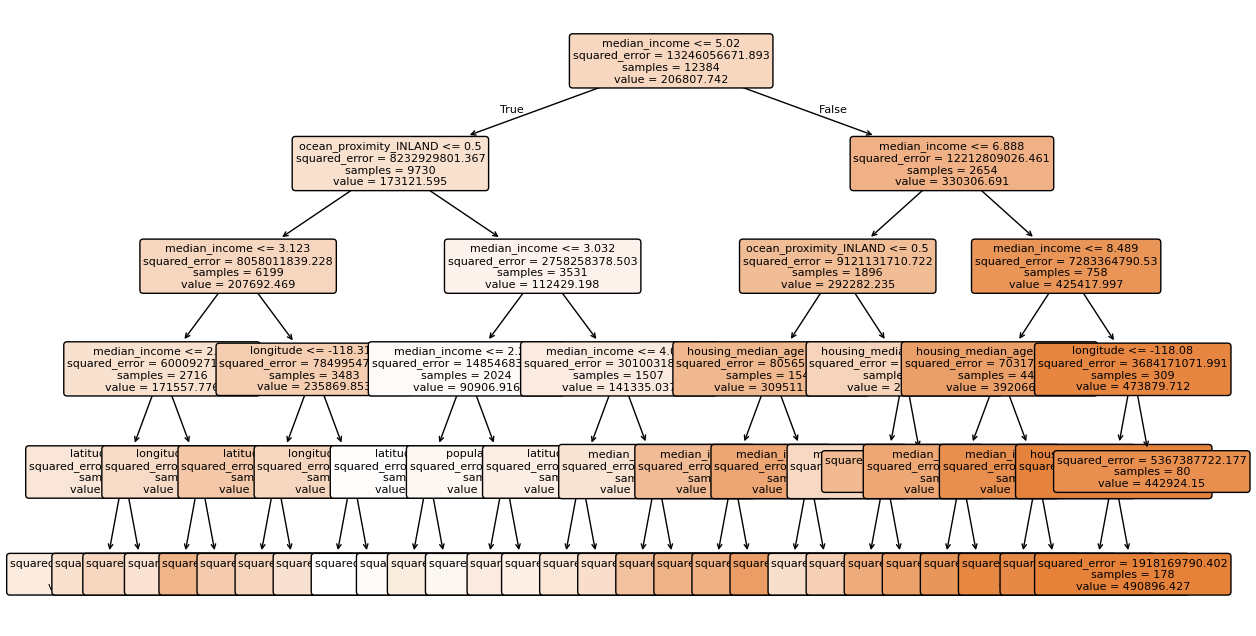

In [26]:
# pré-poda: limitar profundidade e tamanho mínimo de folhas
prepruned = DecisionTreeRegressor(max_depth=5, min_samples_split=100, min_samples_leaf=50, random_state=42)
prepruned.fit(X_train, y_train)

# avaliar
mse_train_pre = mean_squared_error(y_train, prepruned.predict(X_train))
mse_test_pre = mean_squared_error(y_test, prepruned.predict(X_test))
print("MSE train (pré-poda):", mse_train_pre)
print("MSE test (pré-poda):", mse_test_pre)

# visualizar árvore podada (menor)
plt.figure(figsize=(14,8))
tree.plot_tree(prepruned, feature_names=X_df.columns, filled=True, rounded=True, fontsize=8)
plt.show()

median_income( renda mediana da famílias) parece ser a variável mais importante — aparece na raiz da árvore e é o primeiro critério de divisão.
significa que metade das famílias ganha menos e metade ganha mais.

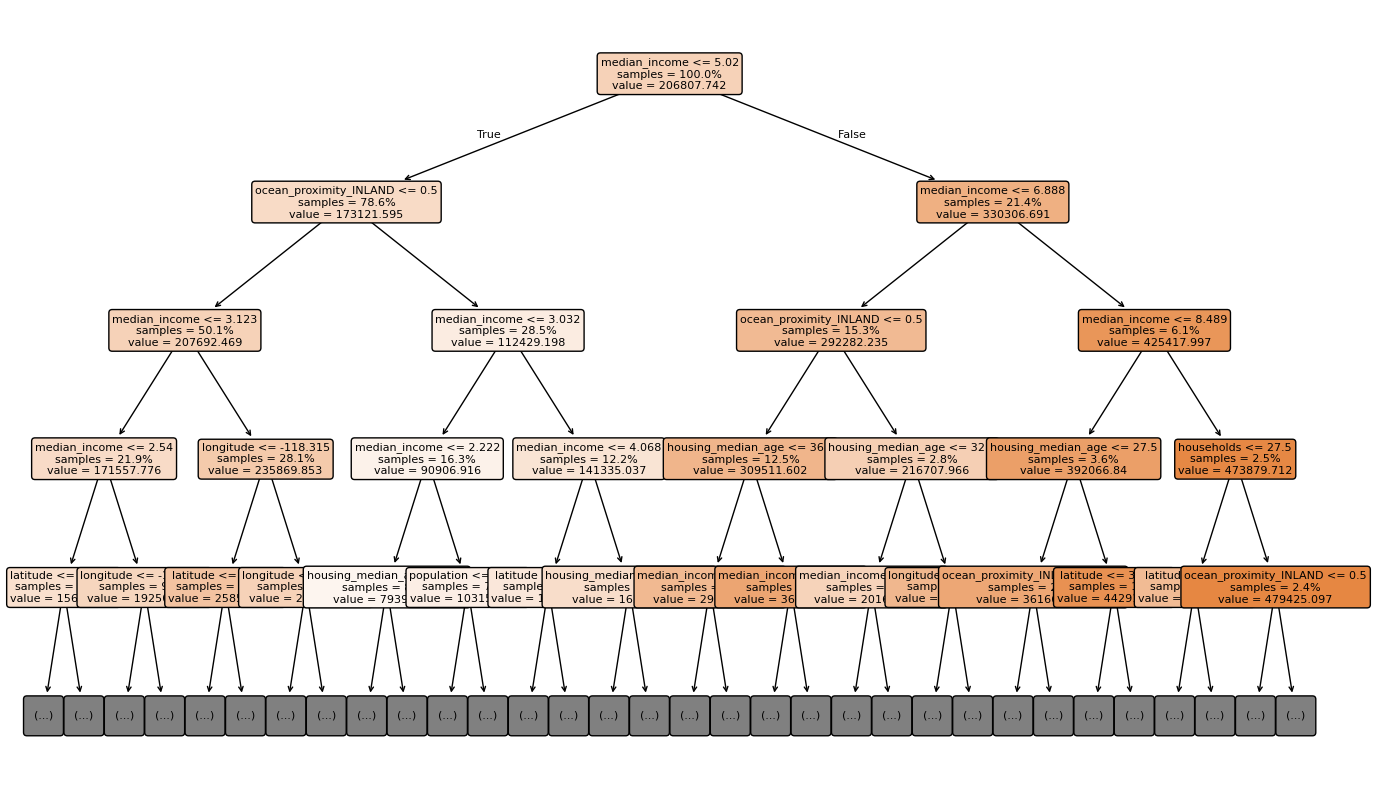

In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 1) Plotar apenas os primeiros 4 níveis da árvore já treinada (sem retrain)
plt.figure(figsize=(14,8))
plot_tree(tree_max8, feature_names=X_df.columns, filled=True, rounded=True,
          fontsize=8, max_depth=4, impurity=False, proportion=True)
plt.tight_layout()
plt.show()



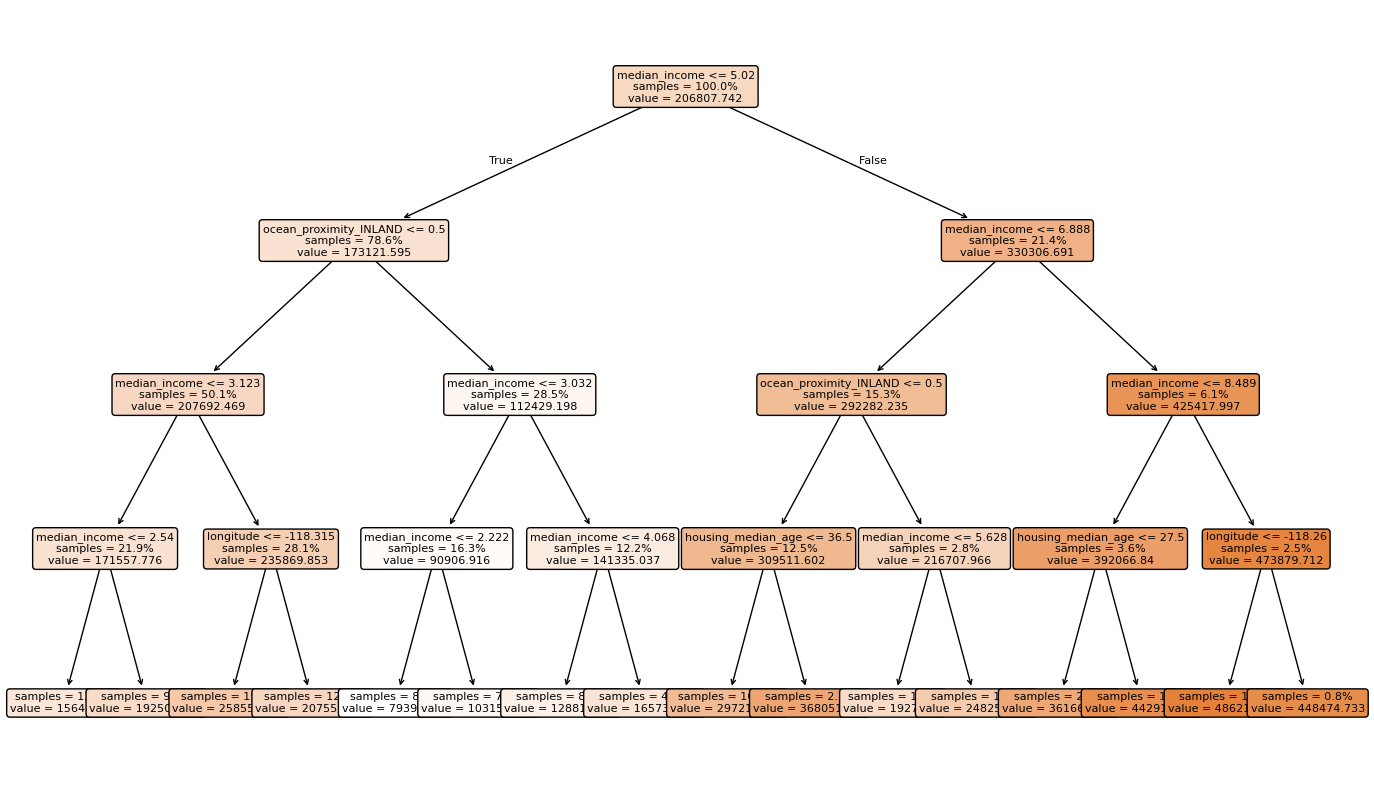

In [32]:
# treinar uma versão pré-podada com profundidade 4 e folhas maiores e plotar (menos galhos)
prepruned = DecisionTreeRegressor(max_depth=4, min_samples_split=200, min_samples_leaf=100, random_state=42)
prepruned.fit(X_train, y_train)

plt.figure(figsize=(14,8))
plot_tree(prepruned, feature_names=X_df.columns, filled=True, rounded=True,
          fontsize=8, impurity=False, proportion=True)
plt.tight_layout()
plt.show()